### Assumption
We assume that 1D lattice deths $V_{ij} (i \neq j)$ are independently calibrated either by parametric heating method or by pulsed lattice method: $P_i = P_j = P_{ij} \rightarrow V_{ij} = V_{ref} [E_R^{\lambda}]$.  
For instance, $P_1 = P_2 = 8 {\rm{mW}} \rightarrow V_{12} = 6  [E_R^{\lambda}]$

### Input parameters
$P_{ij} (i \neq j)$ :  Powers to realized 1D lattice depths $V_{ij}$    
$V_{ij}^{\rm ref}$ : 1D lattice depths created when $P_i = P_j = P_{ij}$  
$V_{ij}^{\rm target}$ : Desired 1D lattice depths  
$P_1^{\rm initial}$ : Initial $P_1$ power  
$\alpha$ : Hyper parameter in gradient method  
$n_{max}$ : Maximum interation  
$r$ : Criterion for convergence  

### Algorithm
1. Using $P_1^{\rm initial} $, calculate $P_2$ to realize $V_{12} = V_{12}^{\rm target}$  
        $P_2 = \left( \frac{V_{12}^{\rm target} \times P_{12}}{V_{12}^{\rm ref}} \right)^2 \frac{1}{P_1}$  
2. Using $P_2$, calculate $P_3$ to realize $V_{23} = V_{23}^{\rm target}$  
        $P_3 = \left( \frac{V_{23}^{\rm target} \times P_{23}}{V_{23}^{\rm ref}} \right)^2 \frac{1}{P_2}$
3. Using $P_1, P_3$, calculate the difference between $V_{31}^{\rm target}$ and $V_{31}$  
        $V_{31} = V_{31}^{\rm ref} \frac{\sqrt(P_3 \times P_1)}{P_{31}}$  
        $Diff = V_{31}^{\rm ref} - V_{31}^{\rm target}$  
4. If $|Diff| < r$, break the loop and show the converged results.
5. Else if the iteration reaches $n_max$, break the loop.
6. If $|Diff| < r$, update $P_1$ and repeat the above 1-3 procedures.  
        $P_1 = P_1 - \alpha \times Diff$


## Load modules

In [16]:
# -*- coding: utf-8 -*-
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
import scipy.optimize
#from scipy.ndimage import gaussian_filter1d
import sys

# Parameters

In [17]:
p12 = 8 #p1=p2=p12 and V12(p12)mesured[ER^(lambda)]
p23 = 6.55 #p2=p3=p23 and V23(p23)measured[ER^(lambda)]
p31 = 8.1 #p3=p1=p31 and V31(p31)measured[ER^(lambda)]
v12measured = 7.43*3/4 #Measured potential [ER^(lambda)]
v23measured = 8.45*3/4 #Measured potential [ER^(lambda)]
v31measured = 9.17*3/4 #Measured potential [ER^(lambda)]

v12 =8 #desired V12 depth [ER^(lambda)] 
v23 = 8 #desired V23 depth [ER^(lambda)] 
v31 = 8 #desired V31 depth [ER^(lambda)] 

p1ini= 5.0 # Initial value of OL(H1) [mW]
alpha = 0.005 #gradient
nmax = 10000 #max interation number
r = 0.0001 #criterion [ER^(lambda)]

## Find optimal P1

converged
13.087466305830725 10.07869300970535 6.78300929512172 -9.96997866558047e-05


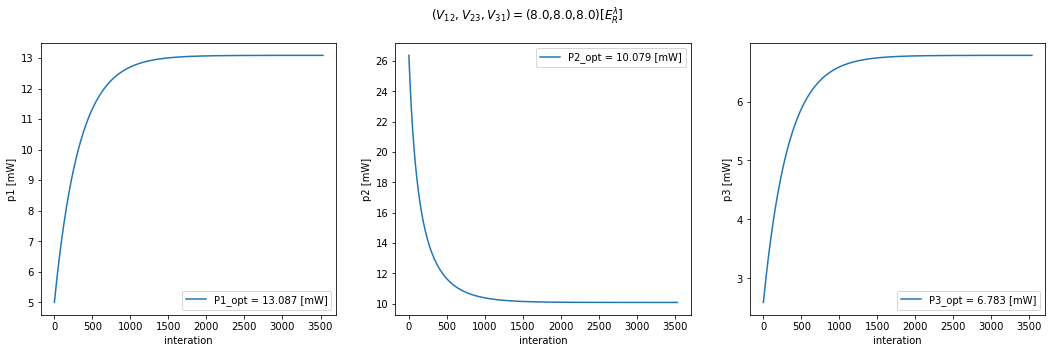

In [18]:
p1_list = []
p2_list = []
p3_list = []
diff_list = []
for i in range(nmax):
    if i == 0:
        p1_temp = p1ini
        p1_list.append(p1ini)
    else:
        p1_list.append(p1_temp)
    p2_temp = (v12*p12/v12measured)**2/p1_temp
    p2_list.append(p2_temp)
    p3_temp = (v23*p23/v23measured)**2/p2_temp
    p3_list.append(p3_temp)
    v31_temp = v31measured*np.sqrt(p3_temp*p1_temp)/p31
    diff_temp = v31_temp - v31
    diff_list.append(diff_temp)
    if i==nmax-1:
        print("reached max interation")
    elif np.abs(diff_temp) > r:
        p1_temp += - alpha*diff_temp
    elif np.abs(diff_temp) <= r:
        print("converged")
        break


print(p1_temp, p2_temp, p3_temp, diff_temp)

fig =plt.figure(figsize=[18,5])
title = r"($V_{12}, V_{23}, V_{31}) =$"
fig.suptitle(title + "(%.01f,%.01f,%.01f)"%(v12,v23,v31)+ r"$[E_R^{\lambda}]$")
ax1 = fig.add_subplot(1,3,1)
ax1.plot(p1_list, label='P1_opt = %.03f [mW]'%(p1_temp))
ax1.set_xlabel('interation')
ax1.set_ylabel('p1 [mW]')
ax1.legend()

ax2 = fig.add_subplot(1,3,2)
ax2.plot(p2_list, label='P2_opt = %.03f [mW]'%(p2_temp))
ax2.set_xlabel('interation')
ax2.set_ylabel('p2 [mW]')
ax2.legend()

ax3 = fig.add_subplot(1,3,3)
ax3.plot(p3_list,label='P3_opt = %.03f [mW]'%(p3_temp))
ax3.set_xlabel('interation')
ax3.set_ylabel('p3 [mW]')
ax3.legend()

